In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
h, w = img.shape[0], img.shape[1]

ker = [[-2, -1], [-2, 0], [-2, 1],
            [-1, -2], [-1, -1], [-1, 0], [-1, 1], [-1, 2],
            [0, -2], [0, -1], [0, 0], [0, 1], [0, 2],
            [1, -2], [1, -1], [1, 0], [1, 1], [1, 2],
            [2, -1], [2, 0], [2, 1]]
J_ker = [[0, -1], [0, 0], [1, 0]]
K_ker = [[-1, 0], [-1, 1], [0, 1]]

In [2]:
def show_result(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [3]:
def dilation(img):
    new_img = np.zeros([h, w], dtype=img.dtype)
    for i in range(h):
        for j in range(w):
            max_val = 0
            for k in range(21):
                x = i + ker[k][0]
                y = j + ker[k][1]
                if (x >= 0 and x < h and y >= 0 and y < w):
                        if img[x][y] > max_val:
                            max_val = img[x][y]
                new_img[i][j] = max_val 
    return new_img

In [10]:
def erosion(img):
    new_img = np.zeros([h, w], dtype=img.dtype)
    for i in range(h):
        for j in range(w):
            min_val = 255
            for k in range(21):
                x = i + ker[k][0]
                y = j + ker[k][1]
                if (x >= 0 and x < h and y >= 0 and y < w):
                    if img[x][y] < min_val:
                            min_val = img[x][y]
                new_img[i][j] = min_val 
    return new_img

In [5]:
def opening(img):
    new_img = np.zeros([h, w], dtype=img.dtype)
    new_img = img
    return dilation(erosion(new_img))

In [6]:
def closing(img):
    new_img = np.zeros([h, w], dtype=img.dtype)
    new_img = img
    return erosion(dilation(new_img))

In [7]:
def show_result(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

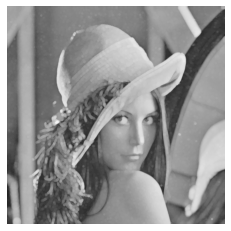

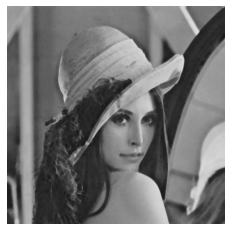

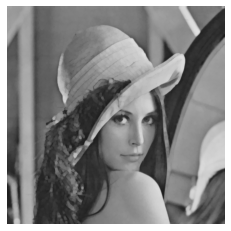

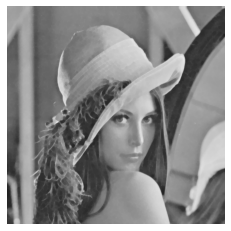

In [11]:
show_result(dilation(img))
show_result(erosion(img))
show_result(opening(img))
show_result(closing(img))